In [2]:
import numpy as np

def get_mnist_data():
    import os
    from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data


    x_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    x_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    data = {'train': {'X': x_train[0:,0,0:28,0:28].reshape((x_train.shape[0],-1)),
                      'y': y_train},
            'test': {'X': x_test[0:,0,0:28,0:28].reshape((x_test.shape[0],-1)),
                     'y': y_test}}
    
    return data


In [3]:
data = get_mnist_data()

In [4]:
m=len(data['train']['y'][:])
n=len(data['test']['y'][:])
def search_indici(x):
    #m=len(data['train']['y'][:])
    #n=len(data['test']['y'][:])
    list_train=np.array([])
    list_test=np.array([])
    for i in range(m):
        if(data['train']['y'][i] == x):
            list_train=np.append(list_train,[i])
    for i in range(n):
        if(data['test']['y'][i] == x):
            list_test=np.append(list_test,[i])        
    return (list_train,list_test)

In [5]:
# construim o functie, pornind de la ideea "functiei train_for_number(x,y)" , care va returna un set de date "(data_x,data_y)"
# parametrii de intrare a functiei vor fi x si y , numerele din perechea de cifre,  iar ch este un String care va reprezenta
# dorinta noastra de extragere a datelor : daca ch='train' extragem datele din data['train']['X'], daca 
# ch='test' extragem datele din data['test']['X']

def data_for_pair(x,y,ch):
    if (ch == 'train'):
        l=0
    if (ch == 'test'):
        l=1
    a=[]
    b=[]
    indici_x=search_indici(x)[l].astype(int)
    indici_y=search_indici(y)[l].astype(int)
    n=len(indici_x)
    m=len(indici_y)
    for i in range(n):
        a.append(data[ch]['X'][indici_x[i]])
    for j in range(m):
        b.append(data[ch]['X'][indici_y[j]])
    data_x = np.asarray(a)
    data_y = np.asarray(b)
    return (data_x,data_y)


In [6]:
train_pair_0_1=data_for_pair(0,1,'train')
test_pair_0_1=data_for_pair(0,1,'test')

print(len(train_pair_0_1[0]),len(train_pair_0_1[1]))
print(len(test_pair_0_1[0]),len(test_pair_0_1[1]))
print(train_pair_0_1[0])

5923 6742
980 1135
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
train_pair_2_7=data_for_pair(2,7,'train')
test_pair_2_7=data_for_pair(2,7,'test')
train_pair_3_4=data_for_pair(3,4,'train')
test_pair_3_4=data_for_pair(3,4,'test')
train_pair_8_9=data_for_pair(8,9,'train')
test_pair_8_9=data_for_pair(8,9,'test')

In [8]:
def y_label_train(lungime,cifra):
    vect = np.empty(lungime)
    vect.fill(cifra)
    return vect

def y_array_label(X,Y,x,y):
    y_t=[]
    y_t.append(y_label_train(len(X),x))
    y_t.append(y_label_train(len(Y),y))
    array_vect=np.concatenate((y_t[0],y_t[1]), axis=None)
    return array_vect
    


X_train01=np.concatenate((train_pair_0_1[0], train_pair_0_1[1]), axis=0)
y_train01=y_array_label(train_pair_0_1[0],train_pair_0_1[1],0,1)

print(X_train01,y_train01,len(X_train01),len(y_train01))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [0. 0. 0. ... 1. 1. 1.] 12665 12665


In [9]:
X_train27=np.concatenate((train_pair_2_7[0], train_pair_2_7[1]), axis=0)
y_train27=y_array_label(train_pair_2_7[0],train_pair_2_7[1],2,7)

print(X_train27,y_train27,len(X_train27),len(y_train27))

X_train34=np.concatenate((train_pair_3_4[0], train_pair_3_4[1]), axis=0)
y_train34=y_array_label(train_pair_3_4[0],train_pair_3_4[1],3,4)
print(X_train34,y_train34,len(X_train34),len(y_train34))

X_train89=np.concatenate((train_pair_8_9[0], train_pair_8_9[1]), axis=0)
y_train89=y_array_label(train_pair_8_9[0],train_pair_8_9[1],8,9)
print(X_train89,y_train89,len(X_train89),len(y_train89))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [2. 2. 2. ... 7. 7. 7.] 12223 12223
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3. 3. 3. ... 4. 4. 4.] 11973 11973
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8. 8. 8. ... 9. 9. 9.] 11800 11800


In [19]:
X_test01=np.concatenate((test_pair_0_1[0], test_pair_0_1[1]), axis=0)
y_test01=y_array_label(test_pair_0_1[0],test_pair_0_1[1],0,1)

X_test27=np.concatenate((test_pair_2_7[0], test_pair_2_7[1]), axis=0)
y_test27=y_array_label(test_pair_2_7[0],test_pair_2_7[1],2,7)

print(X_test27,y_test27,len(X_test27),len(y_test27))

X_test34=np.concatenate((test_pair_3_4[0], test_pair_3_4[1]), axis=0)
y_test34=y_array_label(test_pair_3_4[0],test_pair_3_4[1],3,4)
print(X_test34,y_test34,len(X_test34),len(y_test34))

X_test89=np.concatenate((test_pair_8_9[0], test_pair_8_9[1]), axis=0)
y_test89=y_array_label(test_pair_8_9[0],test_pair_8_9[1],8,9)
print(X_test89,y_test89,len(X_test89),len(y_test89))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [2. 2. 2. ... 7. 7. 7.] 2060 2060
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3. 3. 3. ... 4. 4. 4.] 1992 1992
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8. 8. 8. ... 9. 9. 9.] 1983 1983


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

# Make an instance of the Model
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1100)

model = logisticRegr.fit(X_train27 , y_train27)
predictions = logisticRegr.predict(X_test27)
predictions

array([2., 2., 2., ..., 7., 7., 7.])

Text(0, 0.5, 'Predictions')

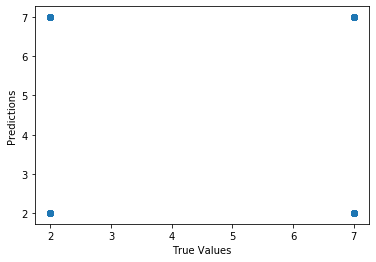

In [22]:
plt.scatter(y_test27, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [18]:
model.score(X_test27, y_test27)

0.9810679611650486

In [23]:
scores = cross_val_score(model, X_train27, y_train27, cv=5)
scores

array([0.98895706, 0.98650307, 0.98364008, 0.98158756, 0.98608838])

In [74]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1100)

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between x (digits) and y (labels)
logisticRegr.fit(X_train01,y_train01)

#Predict the labels of new data (new images)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test01[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test01[0:10])

#Make predictions on entire test data
predictions = logisticRegr.predict(X_test01)

score = logisticRegr.score(X_test01, y_test01)
print(score)

0.9995271867612293


In [75]:
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=1100)

logisticRegr.fit(X_train27,y_train27)

#Predict the labels of new data (new images)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test27[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test27[0:10])

#Make predictions on entire test data
predictions = logisticRegr.predict(X_test27)

score = logisticRegr.score(X_test27, y_test27)
print(score)

0.9810679611650486


In [76]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=1100)

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between x (digits) and y (labels)
logisticRegr.fit(X_train34,y_train34)

#Predict the labels of new data (new images)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test34[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test34[0:10])

#Make predictions on entire test data
predictions = logisticRegr.predict(X_test34)

score = logisticRegr.score(X_test34, y_test34)
print(score)

0.9959839357429718


In [24]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1100)

#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between x (digits) and y (labels)
logisticRegr.fit(X_train89,y_train89)

#Predict the labels of new data (new images)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test89[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test89[0:10])

#Make predictions on entire test data
predictions = logisticRegr.predict(X_test89)

score = logisticRegr.score(X_test89, y_test89)
print(score,predictions)

0.9803328290468987 [8. 8. 8. ... 9. 9. 9.]


Text(0, 0.5, 'Predictions')

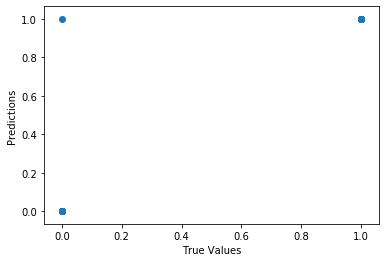

In [90]:
model = logisticRegr.fit(X_train01 , y_train01)
predictions1 = logisticRegr.predict(X_test01)

plt.scatter(y_test01, predictions1)
plt.xlabel('True Values')
plt.ylabel('Predictions')


Text(0, 0.5, 'Predictions')

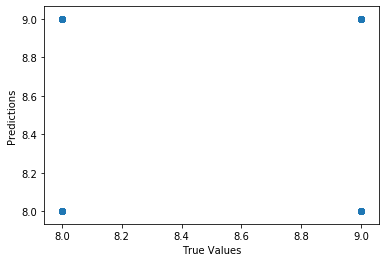

In [25]:
model = logisticRegr.fit(X_train89 , y_train89)
predictions1 = logisticRegr.predict(X_test89)

plt.scatter(y_test89, predictions1)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [158]:
import numpy as np 
import matplotlib.pyplot as plt

model = logisticRegr.fit(X_train01 , y_train01)
predictions = logisticRegr.predict(X_test01)
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test01, predictions1):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

1

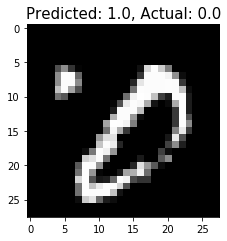

In [159]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test01[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions1[badIndex], y_test01[badIndex]), fontsize = 15)

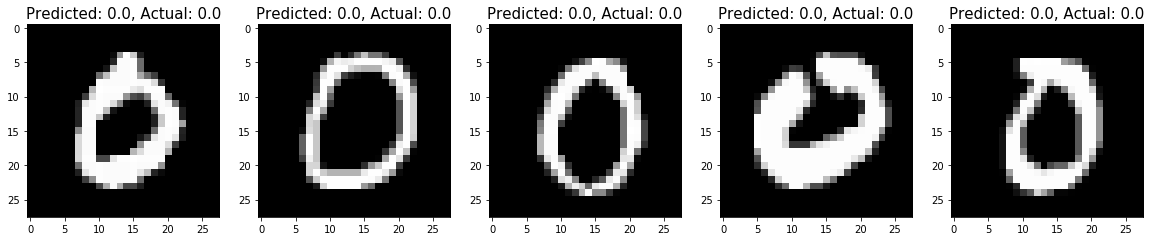

In [160]:
index = 0
classifiedIndexes = []
for label, predict in zip(y_test01, predictions1):
    if label == predict: 
        classifiedIndexes.append(index)
        index +=1

plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(classifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test01[goodIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions1[goodIndex], y_test01[goodIndex]), fontsize = 15)

In [161]:
model = logisticRegr.fit(X_train27 , y_train27)
pred = logisticRegr.predict(X_test27)
index = 0
misclassifiedIndexes = []

for label, predict in zip(y_test27, pred):
    if (label != predict): 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

39

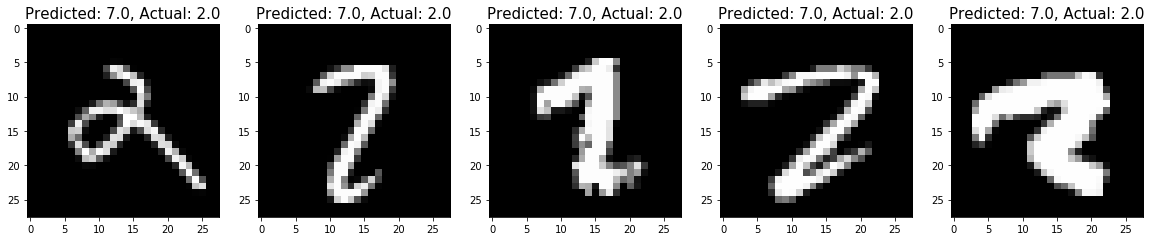

In [162]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test27[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred[badIndex], y_test27[badIndex]), fontsize = 15)

In [163]:
model = logisticRegr.fit(X_train34 , y_train34)
prediction34= logisticRegr.predict(X_test34)
index = 0
misclassifiedIndexes = []

for label, predict in zip(y_test34, prediction34):
    if (label != predict): 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

8

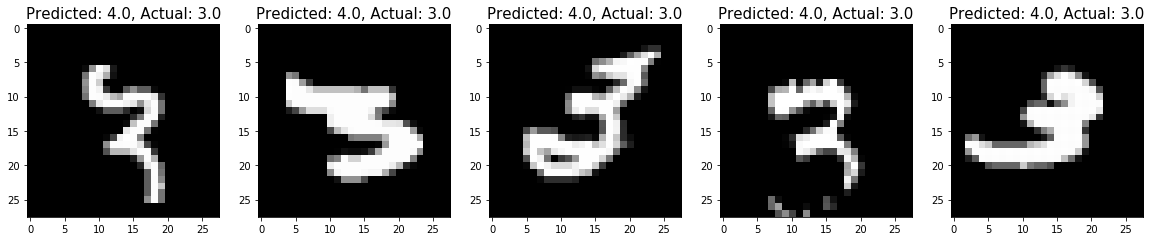

In [164]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test34[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction34[badIndex], y_test34[badIndex]), fontsize = 15)

In [165]:
model = logisticRegr.fit(X_train89 , y_train89)
prediction89= logisticRegr.predict(X_test89)
index = 0
misclassifiedIndexes = []

for label, predict in zip(y_test89, prediction89):
    if (label != predict): 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

39

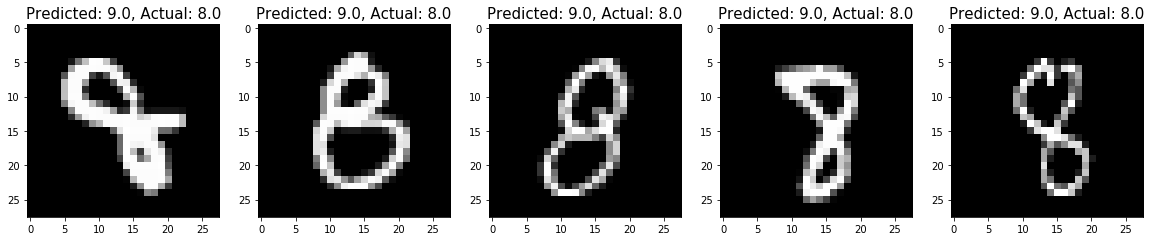

In [166]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test89[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction89[badIndex], y_test89[badIndex]), fontsize = 15)

### Modelul cu toate datele:

In [26]:
X_train_total1=np.concatenate((X_train01, X_train27), axis=0)
X_train_total2=np.concatenate((X_train34, X_train89), axis=0)
X_train_total=np.concatenate((X_train_total1, X_train_total2), axis=0)

y_train_total1=np.concatenate((y_train01, y_train27), axis=0)
y_train_total2=np.concatenate((y_train34, y_train89), axis=0)
y_train_total=np.concatenate((y_train_total1, y_train_total2), axis=0)

X_test_total1=np.concatenate((X_test01, X_test27), axis=0)
X_test_total2=np.concatenate((X_test34, X_test89), axis=0)
X_test_total=np.concatenate((X_test_total1, X_test_total2), axis=0)

y_test_total1=np.concatenate((y_test01, y_test27), axis=0)
y_test_total2=np.concatenate((y_test34, y_test89), axis=0)
y_test_total=np.concatenate((y_test_total1, y_test_total2), axis=0)

In [28]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1100,multi_class='auto')

logisticRegr.fit(X_train_total,y_train_total)

logisticRegr.predict(X_test_total[0].reshape(1,-1))

#Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test_total[0:10])

#Make predictions on entire test data
predictions = logisticRegr.predict(X_test_total)

score = logisticRegr.score(X_test_total,y_test_total)
print(score,predictions)

0.9386503067484663 [0. 0. 0. ... 9. 9. 9.]


In [29]:
model = logisticRegr.fit(X_train_total,y_train_total)
prediction_total= logisticRegr.predict(X_test_total)
index = 0
misclassifiedIndexes = []

for label, predict in zip(y_test_total, prediction_total):
    if (label != predict): 
        misclassifiedIndexes.append(index)
    index +=1
len(misclassifiedIndexes)

500

Text(0, 0.5, 'Predictions')

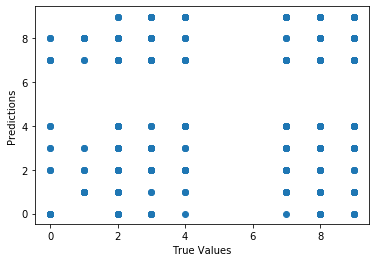

In [30]:
model = logisticRegr.fit(X_train_total,y_train_total)
predictions1 = logisticRegr.predict(X_test_total)

plt.scatter(y_test_total, predictions1)
plt.xlabel('True Values')
plt.ylabel('Predictions')